# Prog6280b: Starbucks

In [1]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Read dataset into dataframe
df = pd.read_csv('../data/starbucks.csv')
df.columns = df.columns.str.strip() # Get rid of trailing spaces in column names

# fixing a random space in the total fat column
df["Total Fat (g)"] = df["Total Fat (g)"].str.replace(" ", ".").astype(float)

# removing % signs
df["Vitamin A (% DV)"] = df["Vitamin A (% DV)"].str.replace("%", "").astype(int)
df["Vitamin C (% DV)"] = df["Vitamin C (% DV)"].str.replace("%", "").astype(int)
df["Calcium (% DV)"] = df["Calcium (% DV)"].str.replace("%", "").astype(int)
df["Iron (% DV)"] = df["Iron (% DV)"].str.replace("%", "").astype(float).astype(int)

df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3.2,0.4,0.0,0,250,67,1,64,5.0,6,8,20,10,0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6,0,10,0,0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6,0,10,0,0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4,0,10,6,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    float64
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    int64  
 14  Vitamin C (% DV)         2

In [ ]:
df.describe()

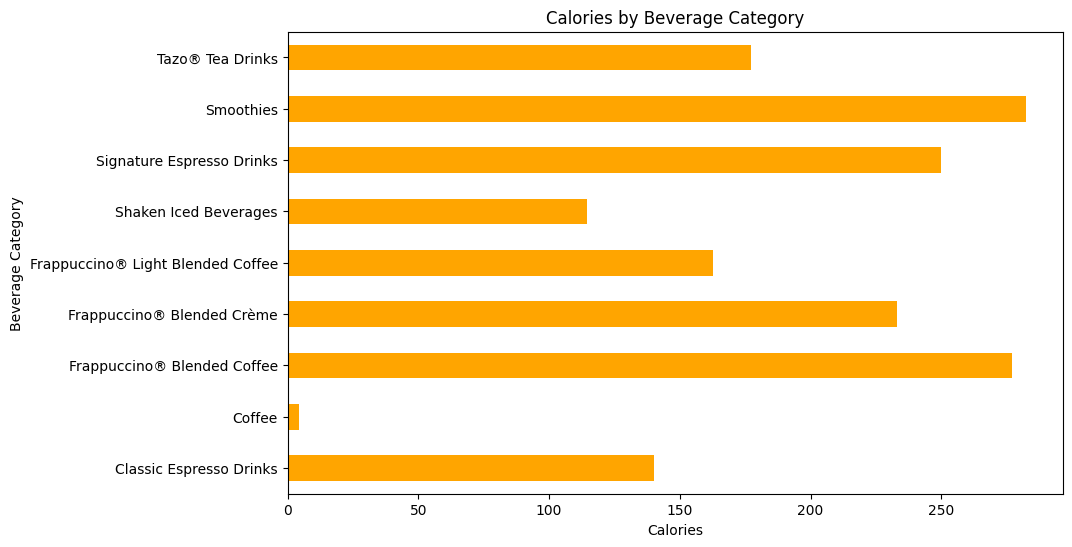

In [10]:
calories_by_beverage = df.groupby('Beverage_category')['Calories'].mean()
plt.figure(figsize=(10,6))
calories_by_beverage.plot(kind='barh', color='orange')
plt.title('Calories by Beverage Category')
plt.xlabel('Calories')
plt.ylabel('Beverage Category')
plt.show()

The calorie content of most drinks range from 150 to around 300, with coffee having almost 0 calories

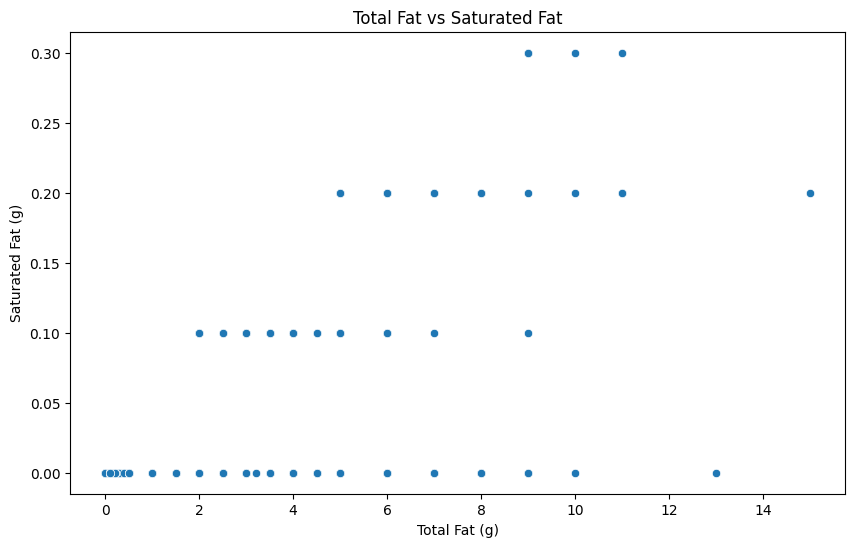

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Total Fat (g)', y='Saturated Fat (g)', data=df)
plt.title('Total Fat vs Saturated Fat')
plt.xlabel('Total Fat (g)')
plt.ylabel('Saturated Fat (g)')
plt.show()

Typically, higher fat drinks also have higher saturated fat, although this is not always the case, showing other factors also influence the saturated fat content of a drink.

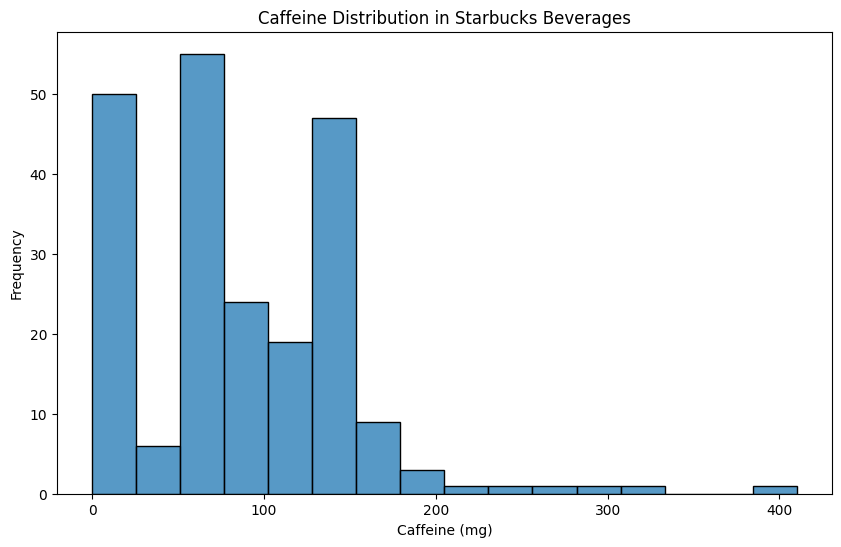

In [29]:
plt.figure(figsize=(10,6))
sorted_df = df.sort_values(by='Caffeine (mg)', ascending=True)
sorted_df['Caffeine (mg)'] = pd.to_numeric(sorted_df['Caffeine (mg)'], errors='coerce')
sns.histplot(x='Caffeine (mg)', data=sorted_df, binwidth=25)
plt.title('Caffeine Distribution in Starbucks Beverages')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Frequency')
plt.show()

Many Starbucks drinks have no caffeine, but among the drinks that do, most have between 50 and 150 mg of caffeine, with a few drinks as outliers as high as 400 mg of caffeine.

<Figure size 1600x1000 with 0 Axes>

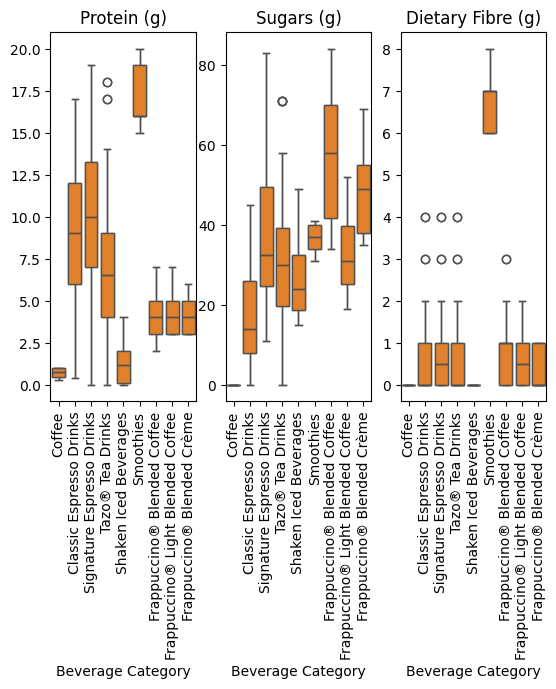

In [3]:
plt.figure(figsize=(16, 10))
fig, axs = plt.subplots(ncols=3,)
sns.boxplot(x='Beverage_category', y='Protein (g)', data=df, ax=axs[0])
sns.boxplot(x='Beverage_category', y='Sugars (g)', data=df, ax=axs[1])
sns.boxplot(x='Beverage_category',y='Dietary Fibre (g)', data=df, ax=axs[2])
for i, nutrient in enumerate(['Protein (g)', 'Sugars (g)', 'Dietary Fibre (g)']):
    plt.subplot(1,3,i+1)
    plt.xticks(rotation=90)
    sns.boxplot(x='Beverage_category', y=nutrient, data=df, ax=axs[i])
    plt.xlabel("Beverage Category")
    plt.ylabel("")
    plt.title(nutrient)

Most drinks vary from 5 to 15 grams of protein, with Coffee and Shaken Iced Beverages having much less and Smoothies having much more.  Most drinks have between 20 and 60 grams of sugar, with Coffee having much less once again.  Most drinks have very little fiber, with Smoothies having much more.

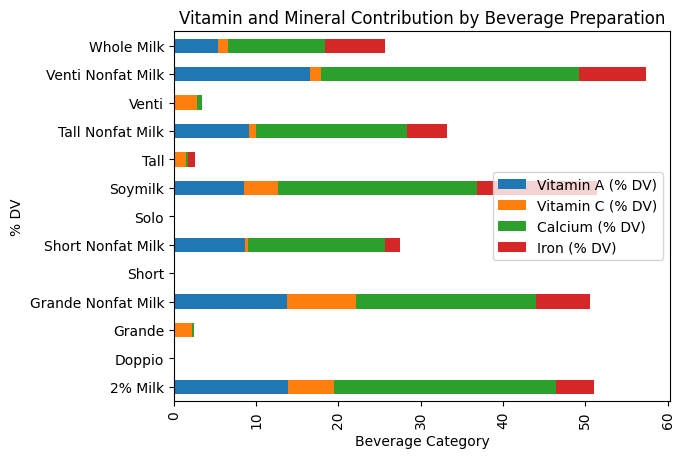

In [11]:
vitamin_beverage = df.groupby('Beverage_prep')[['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']].mean()
ax = vitamin_beverage.plot.barh(stacked=True)
plt.title('Vitamin and Mineral Contribution by Beverage Preparation')
plt.xlabel('Beverage Category')
plt.ylabel('% DV')
plt.xticks(rotation=90)
plt.show()

Drinks with any kind of milk have much higher vitamin and mineral contents than drinks made without milk.